`app` と `channel` の相関を調べる。

In [1]:
import psycopg2
import seaborn as sns
import pandas as pd
import json
%matplotlib inline

/home/kenkoooo/.pyenv/versions/3.6.2/envs/talkingdata/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
with open("config.json") as f:
    connection=psycopg2.connect(json.load(f)["psql"])
count_by_app_channel=pd.read_sql_query("SELECT to_char(app,'99999')||'_'||to_char(count,'999999999') AS app_channel,count FROM count_by_app_channel ORDER BY count DESC;", connection)
count_by_app_channel

,app_channel,count
0,3_ 14507909,14507909
1,18_ 8750331,8750331
2,15_ 5786795,5786795
3,12_ 5253765,5253765
4,12_ 4693367,4693367
5,2_ 3884274,3884274
6,18_ 3443694,3443694
7,8_ 3370954,3370954
8,13_ 3242433,3242433
9,12_ 3090102,3090102


`train` と `test` のクリック数は全部で 203694359 件

In [3]:
total=count_by_app_channel["count"].sum()
total

203694359

データに含まれる `app` と `channel` の組み合わせは 1457 通りあるが、そのうち上位 1 割に当たる 145 件だけで全体の 94.7% を占める。

In [18]:
count_by_app_channel[:145]["count"].sum()/total

0.9472601938868617

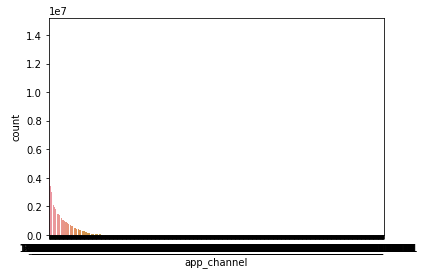

In [8]:
sns.barplot(x="app_channel", y="count", data=count_by_app_channel)